In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load Data

In [230]:
path="/content/drive/MyDrive/WorkSpace/ML/Predictive Analytics/Customer-Churn-Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
import pandas as pd
df=pd.read_csv(path)
print(len(df))
df.head(5)

7043


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [231]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

##EDA-Part1  Data Analysis 

In [232]:
#df['gender'].values.ndim
#df.ndim

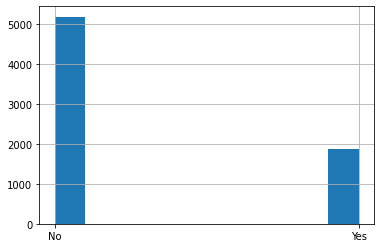

In [233]:
df['Churn'].hist()

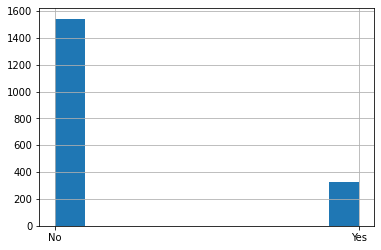

In [234]:
df[df['Churn']=='Yes']['Dependents'].hist()

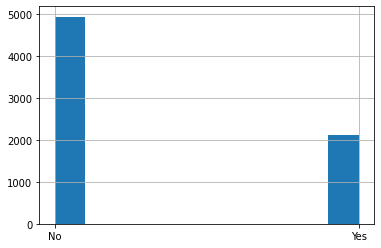

In [235]:
df['Dependents'].hist()

In [236]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [237]:
import numpy as np
#len(df[df['SeniorCitizen'].isna()==True])
#len(df[df['tenure']==np.nan])
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [238]:
df.isnull().values.any()

False

##Label Encoding

In [239]:
df['Churn_encoded']=0
for i in range(0,len(df)):
  if df['Churn'][i]=="No":
    df['Churn_encoded'][i]=0
  elif df['Churn'][i]=="Yes":
    df['Churn_encoded'][i]=1
print(df['Churn_encoded'].unique())
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[0 1]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [240]:
from sklearn.preprocessing import label_binarize ,LabelEncoder
LE=LabelEncoder()
df['Churn']=LE.fit_transform(df['Churn'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


##One hot encoding

In [241]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [242]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [243]:
df = pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Churn_encoded,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,0,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.5,0,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,1,1,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,0,0,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,1,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
df.isnull().sum()

##Convert to integer

In [245]:
#df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']].astype(float)
print(type(df['TotalCharges'][0]))
#df['TotalCharges']=df['TotalCharges'].map(float)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
print(type(df['TotalCharges'][0]))

<class 'str'>
<class 'numpy.float64'>


##Handle null

In [246]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=np.nan, strategy='mean', 
                 fill_value=None, verbose=0, copy=True, add_indicator=False)
#Mean,Median,Mode
#1,1,2,3,3,3,3,3,2,2, 

In [247]:
df['TotalCharges']=SI.fit_transform(df['TotalCharges'].values.reshape(-1,1))
df['TotalCharges'].isnull().sum()

0

In [248]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

##Part2-Get Dependent and Independent Variable

In [249]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Churn_encoded', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [250]:
X=df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']] #IV
Y=df['Churn'] #DV
print(X.shape,Y.shape)

(7043, 14) (7043,)


In [251]:
X.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,1


In [252]:
Y.head(2)

0    0
1    0
Name: Churn, dtype: int64

##Train test split

In [253]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(X,Y)
print(x_tr.shape,x_ts.shape,y_tr.shape,y_ts.shape)

(5282, 14) (1761, 14) (5282,) (1761,)


##Apply ML

In [254]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#Parameter tuning-Model optimization
model2=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                              min_samples_split=2, min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0, max_features=None, 
                              random_state=None, max_leaf_nodes=None,
                              min_impurity_decrease=0.0, min_impurity_split=None, 
                              class_weight=None, presort='deprecated', ccp_alpha=0.0)
model1=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None,
                              min_samples_split=2, min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0, max_features='auto', 
                              max_leaf_nodes=None, min_impurity_decrease=0.0, 
                              min_impurity_split=None, bootstrap=True, oob_score=False, 
                              n_jobs=None, random_state=None, verbose=1,
                              warm_start=False, class_weight=None, ccp_alpha=0.0, 
                              max_samples=None)

In [255]:
model1.fit(x_tr,y_tr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [256]:
y_pred=model1.predict(x_ts)
print(len(y_pred))
y_pred

1761


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 0, 0])

In [257]:
print(len(y_ts))
y_ts

1761


4347    0
6280    0
1374    0
2082    0
4573    0
       ..
6492    0
5654    0
320     1
4644    0
6335    0
Name: Churn, Length: 1761, dtype: int64

In [258]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [259]:
accuracy_score(y_ts,y_pred)

0.7779670641680864

In [260]:
confusion_matrix(y_ts,y_pred)

array([[1149,  145],
       [ 246,  221]])

In [261]:
 (1271/(1271+490))

0.7217490062464509

##Apply Deep Learning

In [272]:
import tensorflow as tf
from tensorflow import keras

In [273]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(14,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),

])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_tr,y_tr,epochs=200)

Epoch 1/200
166/166 [==============================] - 1s 1ms/step - loss: 2.9595 - accuracy: 0.6721
Epoch 2/200
166/166 [==============================] - 0s 1ms/step - loss: 0.7602 - accuracy: 0.7402
Epoch 3/200
166/166 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.7562
Epoch 4/200
166/166 [==============================] - 0s 1ms/step - loss: 0.7257 - accuracy: 0.7573
Epoch 5/200
166/166 [==============================] - 0s 1ms/step - loss: 0.6349 - accuracy: 0.7601
Epoch 6/200
166/166 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.7628
Epoch 7/200
166/166 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.7690
Epoch 8/200
166/166 [==============================] - 0s 1ms/step - loss: 0.8096 - accuracy: 0.7633
Epoch 9/200
166/166 [==============================] - 0s 1ms/step - loss: 0.6186 - accuracy: 0.7694
Epoch 10/200
166/166 [==============================] - 0s 1ms/step - loss: 0.6082 - accura

In [ ]:
#Use Early stopping 

In [274]:
model.evaluate(x_ts,y_ts)

56/56 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7791


[0.4695098102092743, 0.7791028022766113]

In [275]:
yp = model.predict(x_ts)

In [276]:
y_ts[:10]

4347    0
6280    0
1374    0
2082    0
4573    0
6635    0
5801    0
3247    0
5543    0
932     0
Name: Churn, dtype: int64

In [277]:
y_pred = []
for e in yp:
    if e>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [278]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [279]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1294
           1       0.57      0.70      0.63       467

    accuracy                           0.78      1761
   macro avg       0.72      0.75      0.73      1761
weighted avg       0.80      0.78      0.79      1761

